🌱 bhumi – Iris Flower Classification



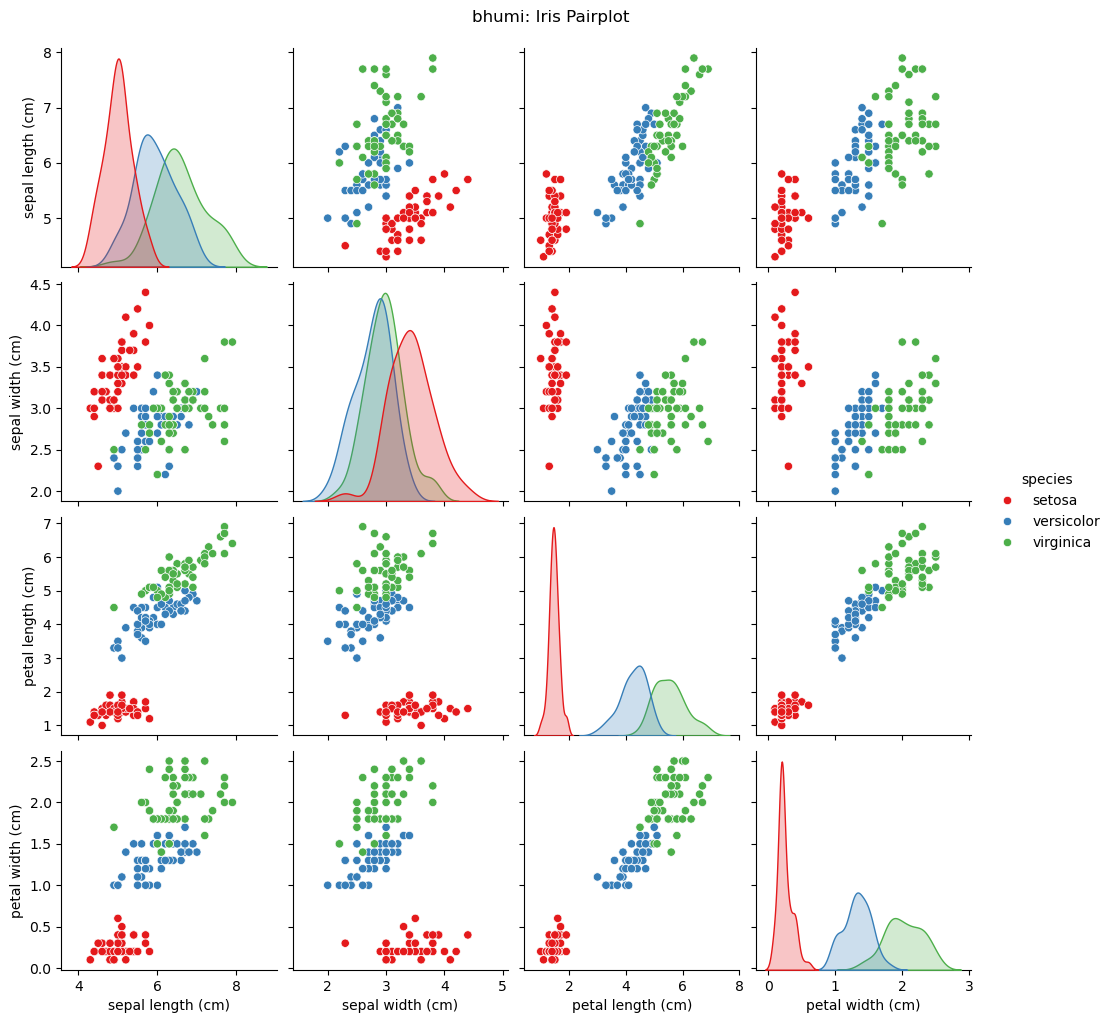


✅ bhumi Accuracy Score: 1.0

📄 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



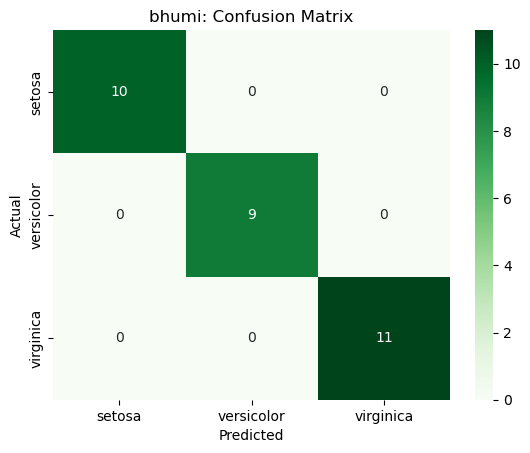

C:\Users\davep\AppData\Local\Temp\ipykernel_6980\4239233339.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


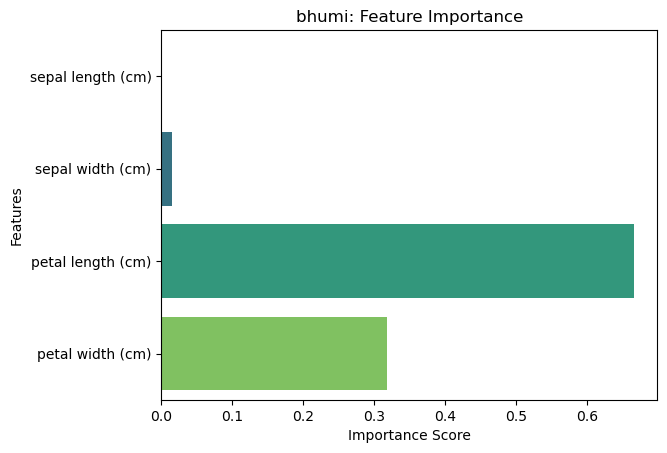

In [1]:
# bhumi_iris_classifier.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# -----------------------------
# 1. Load and Prepare Dataset
# -----------------------------
def load_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
    return df, iris.target_names

# -----------------------------
# 2. Visualize the Data
# -----------------------------
def visualize_data(df):
    sns.pairplot(df, hue='species', palette='Set1')
    plt.suptitle("bhumi: Iris Pairplot", y=1.02)
    plt.show()

# -----------------------------
# 3. Preprocess and Split
# -----------------------------
def preprocess_and_split(df):
    X = df.drop('species', axis=1)
    y = df['species']
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# -----------------------------
# 4. Train bhumi Model
# -----------------------------
def train_bhumi_model(X_train, y_train):
    model = GradientBoostingClassifier(n_estimators=120, learning_rate=0.1, random_state=42)
    model.fit(X_train, y_train)
    return model

# -----------------------------
# 5. Evaluate Model
# -----------------------------
def evaluate_model(model, X_test, y_test, class_names):
    y_pred = model.predict(X_test)

    print("\n✅ bhumi Accuracy Score:", accuracy_score(y_test, y_pred))
    print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=class_names)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
    plt.title("bhumi: Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# -----------------------------
# 6. Feature Importance
# -----------------------------
def show_feature_importance(model, feature_names):
    importances = model.feature_importances_
    sns.barplot(x=importances, y=feature_names, palette="viridis")
    plt.title("bhumi: Feature Importance")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.show()

# -----------------------------
# Run bhumi Classifier
# -----------------------------
def main():
    print("🌱 bhumi – Iris Flower Classification\n")

    df, class_names = load_data()
    visualize_data(df)

    X_train, X_test, y_train, y_test = preprocess_and_split(df)

    model = train_bhumi_model(X_train, y_train)
    evaluate_model(model, X_test, y_test, class_names)
    show_feature_importance(model, df.columns[:-1])

if __name__ == "__main__":
    main()
